In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2cf74d4e-6b0b-4f10-bb86-28d633e35e8f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-02T06:10:20.479Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
df= pd.json_normalize(data['data'])

In [5]:
df['timestamp']= pd.to_datetime('now')

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964235e+07,1.964235e+07,False,NaN,1,NaN,NaN,None,2024-03-02T06:08:00.000Z,62065.970416,3.966500e+10,-32.3949,-0.006299,1.209228,21.730704,47.342278,37.306824,57.451321,1.219122e+12,52.3065,1.303385e+12,None,2024-03-02T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
1,1027,Ethereum,ETH,ethereum,8484,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201389e+08,1.201389e+08,True,NaN,2,NaN,NaN,None,2024-03-02T06:08:00.000Z,3420.022807,1.663424e+10,-34.4773,-0.244008,1.331945,16.129483,50.724828,43.832951,58.388323,4.108777e+11,17.6287,4.108777e+11,None,2024-03-02T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
2,825,Tether USDt,USDT,tether,76664,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.917934e+10,1.016001e+11,True,NaN,3,NaN,NaN,None,2024-03-02T06:07:00.000Z,1.001147,8.005590e+10,-21.6142,-0.007065,0.098923,0.137615,0.208793,0.058865,0.068014,9.929305e+10,4.2602,1.017166e+11,None,2024-03-02T06:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 00:10:28.294674
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495421e+08,1.495421e+08,False,NaN,4,NaN,NaN,None,2024-03-02T06:07:00.000Z,410.213691,1.585456e+09,-19.3292,-0.276334,1.131959,8.066403,37.699905,28.955226,80.258330,6.134421e+10,2.6320,6.134421e+10,None,2024-03-02T06:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.428250e+08,5.708773e+08,True,NaN,5,NaN,NaN,None,2024-03-02T06:08:00.000Z,128.226548,3.990425e+09,-42.2963,-0.801027,-4.400663,26.601267,36.012769,14.114592,100.378854,5.678192e+10,2.4362,7.320162e+10,None,2024-03-02T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-02T06:08:00.000Z,0.626996,2.479762e+09,-24.4636,-0.136146,5.939502,16.157920,26.898534,-0.516354,1.149370,3.427412e+10,1.4705,6.269959e+10,None,2024-03-02T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.902797e+10,2.902797e+10,False,NaN,7,NaN,NaN,None,2024-03-02T06:08:00.000Z,0.999936,7.512488e+09,-23.7262,-0.005477,0.020791,0.013855,-0.015318,0.017524,-0.003289,2.902612e+10,1.2456,2.902612e+10,None,2024-03-02T06:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 00:10:28.294674
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547978e+10,3.667143e+10,False,NaN,8,NaN,NaN,None,2024-03-02T06:07:00.000Z,0.748188,1.255124e+09,-17.7452,-1.181634,11.555331,28.828909,52.701432,19.352995,88.832961,2.654554e+10,1.1390,3.366845e+10,None,2024-03-02T06:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:10:28.294674
8,74,Dogecoin,DOGE,dogecoin,899,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...

In [19]:
def ap1_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2cf74d4e-6b0b-4f10-bb86-28d633e35e8f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2= pd.json_normalize(data['data'])
    df2['timestamp']= pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2, df_append])

    

In [20]:
import os
from time import time
from time import sleep

for i in range(333):
    ap1_runner()
    print ('API RUNNER completed successfully')
    sleep(20)
exit()

{'status': {'timestamp': '2024-03-02T06:29:56.237Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-02T06:30:16.420Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-02T06:30:36.638Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-02T06:30:56.824Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19642431.00000,19642431.00000,False,NaN,1,NaN,NaN,None,2024-03-02T06:29:00.000Z,62274.32971,39643884756.01302,-31.42560,0.36201,1.08930,22.13242,47.75533,37.50727,57.84809,1223219224440.56934,52.30720,1307760923953.44995,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
1,1027,Ethereum,ETH,ethereum,8484,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120138874.30530,120138874.30530,True,NaN,2,NaN,NaN,None,2024-03-02T06:29:00.000Z,3445.33688,16855168732.00609,-33.29650,0.75952,1.51860,16.92569,51.86680,44.52223,59.51699,413918894465.93256,17.70000,413918894465.92999,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
2,825,Tether USDt,USDT,tether,76664,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,99179337470.68521,101600078701.91211,True,NaN,3,NaN,NaN,None,2024-03-02T06:28:00.000Z,1.00099,80330717596.56802,-20.64610,-0.00993,0.08351,0.11591,0.18357,0.04939,0.07750,99277302368.29210,4.24530,101700434699.05000,None,2024-03-02T06:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 00:30:56.850766
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149542077.09917,149542077.09917,False,NaN,4,NaN,NaN,None,2024-03-02T06:28:00.000Z,410.89755,1591574382.09195,-18.78700,0.00156,1.11735,8.27309,38.06131,29.28154,80.28963,61446473145.33447,2.62760,61446473145.33000,None,2024-03-02T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,442824870.56493,570877190.75478,True,NaN,5,NaN,NaN,None,2024-03-02T06:29:00.000Z,129.12921,3974470684.07042,-42.51380,0.26247,-3.06650,27.49597,36.97024,14.58432,101.84519,57181625787.13409,2.44520,73716920755.84000,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,None,2024-03-02T06:29:00.000Z,0.62745,2480505613.70643,-23.36910,0.43726,6.04304,15.99133,27.29735,-0.39539,1.18188,34298676358.86169,1.46670,62744505948.62000,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29027593175.02472,29027593175.02472,False,NaN,7,NaN,NaN,None,2024-03-02T06:29:00.000Z,0.99983,7542625135.15544,-22.78320,-0.00689,-0.00846,-0.00891,-0.01675,-0.01305,0.00013,29022742462.73048,1.24080,29022742462.73000,None,2024-03-02T06:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 00:30:56.850766
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35479784625.53400,36671429496.44700,False,NaN,8,NaN,NaN,None,2024-03-02T06:28:00.000Z,0.74924,1263066694.96157,-14.30150,-0.24657,11.67379,28.97913,53.23906,19.76040,89.02725,26583036893.18345,1.13660,33716006813.99000,None,2024-03-02T06:28

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19642431.00000,19642431.00000,False,NaN,1,NaN,NaN,None,2024-03-02T06:29:00.000Z,62274.32971,39643884756.01302,-31.42560,0.36201,1.08930,22.13242,47.75533,37.50727,57.84809,1223219224440.56934,52.30720,1307760923953.44995,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
1,1027,Ethereum,ETH,ethereum,8484,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120138874.30530,120138874.30530,True,NaN,2,NaN,NaN,None,2024-03-02T06:29:00.000Z,3445.33688,16855168732.00609,-33.29650,0.75952,1.51860,16.92569,51.86680,44.52223,59.51699,413918894465.93256,17.70000,413918894465.92999,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
2,825,Tether USDt,USDT,tether,76664,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,99179337470.68521,101600078701.91211,True,NaN,3,NaN,NaN,None,2024-03-02T06:28:00.000Z,1.00099,80330717596.56802,-20.64610,-0.00993,0.08351,0.11591,0.18357,0.04939,0.07750,99277302368.29210,4.24530,101700434699.05000,None,2024-03-02T06:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 00:30:56.850766
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149542077.09917,149542077.09917,False,NaN,4,NaN,NaN,None,2024-03-02T06:28:00.000Z,410.89755,1591574382.09195,-18.78700,0.00156,1.11735,8.27309,38.06131,29.28154,80.28963,61446473145.33447,2.62760,61446473145.33000,None,2024-03-02T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,442824870.56493,570877190.75478,True,NaN,5,NaN,NaN,None,2024-03-02T06:29:00.000Z,129.12921,3974470684.07042,-42.51380,0.26247,-3.06650,27.49597,36.97024,14.58432,101.84519,57181625787.13409,2.44520,73716920755.84000,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,None,2024-03-02T06:29:00.000Z,0.62745,2480505613.70643,-23.36910,0.43726,6.04304,15.99133,27.29735,-0.39539,1.18188,34298676358.86169,1.46670,62744505948.62000,None,2024-03-02T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 00:30:56.850766
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29027593175.02472,29027593175.02472,False,NaN,7,NaN,NaN,None,2024-03-02T06:29:00.000Z,0.99983,7542625135.15544,-22.78320,-0.00689,-0.00846,-0.00891,-0.01675,-0.01305,0.00013,29022742462.73048,1.24080,29022742462.73000,None,2024-03-02T06:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 00:30:56.850766
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35479784625.53400,36671429496.44700,False,NaN,8,NaN,NaN,None,2024-03-02T06:28:00.000Z,0.74924,1263066694.96157,-14.30150,-0.24657,11.67379,28.97913,53.23906,19.76040,89.02725,26583036893.18345,1.13660,33716006813.99000,None,2024-03-02T06:28

In [39]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
print(df3)

             quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          0.36201                       1.08930   
Ethereum                         0.75952                       1.51860   
Tether USDt                     -0.00993                       0.08351   
BNB                              0.00156                       1.11735   
Solana                           0.26247                      -3.06650   
XRP                              0.43726                       6.04304   
USDC                            -0.00689                      -0.00846   
Cardano                         -0.24657                      11.67379   
Dogecoin                         1.17686                      17.01793   
Avalanche                        0.54919                       1.17963   
Chainlink                       -0.14125                       7.56008   
TRON                             0.110

In [43]:
df4= df3.stack()
pd.set_option('display.max_rows', None)
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.36201
             quote.USD.percent_change_24h     1.08930
             quote.USD.percent_change_7d     22.13242
             quote.USD.percent_change_30d    47.75533
             quote.USD.percent_change_60d    37.50727
             quote.USD.percent_change_90d    57.84809
Ethereum     quote.USD.percent_change_1h      0.75952
             quote.USD.percent_change_24h     1.51860
             quote.USD.percent_change_7d     16.92569
             quote.USD.percent_change_30d    51.86680
             quote.USD.percent_change_60d    44.52223
             quote.USD.percent_change_90d    59.51699
Tether USDt  quote.USD.percent_change_1h     -0.00993
             quote.USD.percent_change_24h     0.08351
             quote.USD.percent_change_7d      0.11591
             quote.USD.percent_change_30d     0.18357
             quote.USD.percent_change_60d     0.04939
             quote.USD.percent_change_90

In [44]:
df5= df4.to_frame(name= 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.36201
            quote.USD.percent_change_24h   1.08930
            quote.USD.percent_change_7d   22.13242
            quote.USD.percent_change_30d  47.75533
            quote.USD.percent_change_60d  37.50727
            quote.USD.percent_change_90d  57.84809
Ethereum    quote.USD.percent_change_1h    0.75952
            quote.USD.percent_change_24h   1.51860
            quote.USD.percent_change_7d   16.92569
            quote.USD.percent_change_30d  51.86680
            quote.USD.percent_change_60d  44.52223
            quote.USD.percent_change_90d  59.51699
Tether USDt quote.USD.percent_change_1h   -0.00993
            quote.USD.percent_change_24h   0.08351
            quote.USD.percent_change_7d    0.11591
            quote.USD.percent_change_30d   0.18357
            quote.USD.percent_change_60d   0.04939
            quote.USD.percent_change_90d   0.07750
BNB         quote.USD.percent_change_1h    0.00156
            quote.USD.percent_change_24h   1.11735
            quote.USD.percent_change_7d    8.27309
            quote.USD.percent_change_30d  38.06131
            quote.USD.percent_change_60d  29.28154
            quote.USD.percent_change_90d  80.28963
Solana      quote.USD.percent_change_1h    0.26247
            quote.USD.percent_change_24h  -3.06650
            quote.USD.percent_change_7d   27.49597
            quote.USD.percent_change_30d  36.97024
            quote.USD.percent_change_60d  14.58432
            quote.USD.percent_change_90d 101.84519
XRP         quote.USD.percent_change_1h    0.43726
            quote.USD.percent_change_24h   6.04304
            quote.USD.percent_change_7d   15.99133
            quote.USD.percent_change_30d  27.29735
            quote.USD.percent_change_60d  -0.39539
            quote.USD.percent_change_90d   1.18188
USDC        quote.USD.percent_change_1h   -0.00689
            quote.USD.percent_change_24h  -0.00846
            quote.USD.percent_change_7d   -0.00891
            quote.USD.percent_change_30d  -0.01675
            quote.USD.percent_change_60d  -0.01305
            quote.USD.percent_change_90d   0.00013
Cardano     quote.USD.percent_change_1h   -0.24657
            quote.USD.percent_change_24h  11.67379
            quote.USD.percent_change_7d   28.97913
            quote.USD.percent_change_30d  53.23906
            quote.USD.percent_change_60d  19.76040
            quote.USD.percent_change_90d  89.02725
Dogecoin    quote.USD.percent_change_1h    1.17686
            quote.USD.percent_change_24h  17.01793
            quote.USD.percent_change_7d   67.58834
            quote.USD.percent_change_30d  80.73664
            quote.USD.percent_change_60d  52.74694
            quote.USD.percent_change_90d  66.41900
Avalanche   quote.USD.percent_change_1h    0.54919
            quote.USD.percent_change_24h   1.17963
            quote.USD.percent_change_7d   19.25206
            quote.USD.percent_change_30d  30.79291
            quote.USD.percent_change_60d   1.13572
            quote.USD.percent_change_90d  94.83038
Chainlink   quote.USD.percent_change_1h   -0.14125
            quote.USD.percent_change_24h   7.56008
            quote.USD.percent_change_7d   16.03825
            quote.USD.percent_change_30d  36.19505
            quote.USD.percent_change_60d  34.46602
            quote.USD.percent_change_90d  33.31629
TRON        quote.USD.percent_change_1h    0.11067
            quote.USD.percent_change_24h  -0.32543
            quote.USD.percent_change_7d    2.06036
            quote.USD.percent_change_30d  24.90669
            quote.USD.percent_change_60d  29.83920
            quote.USD.percent_change_90d  36.19710
Shiba Inu   quote.USD.percent_change_1h    3.00630
            quote.USD.percent_change_24h  62.66267
            quote.USD.percent_change_7d  118.34366
            quote.USD.percent_change_30d 134.12203
            quote.USD.percent_change_60d  92.58113
            quo

In [45]:
df5.count()

values    90
dtype: int64

In [50]:
index= pd.Index(range(90))

df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.36201
1,Bitcoin,quote.USD.percent_change_24h,1.08930
2,Bitcoin,quote.USD.percent_change_7d,22.13242
3,Bitcoin,quote.USD.percent_change_30d,47.75533
4,Bitcoin,quote.USD.percent_change_60d,37.50727
5,Bitcoin,quote.USD.percent_change_90d,57.84809
6,Ethereum,quote.USD.percent_change_1h,0.75952
7,Ethereum,quote.USD.percent_change_24h,1.51860
8,Ethereum,quote.USD.percent_change_7d,16.92569
9,Ethereum,quote.USD.percent_change_30d,51.86680


In [65]:
df7= df6.rename(columns= {'level_1': 'percent_change'})

In [67]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.36201
1,Bitcoin,24h,1.08930
2,Bitcoin,7d,22.13242
3,Bitcoin,30d,47.75533
4,Bitcoin,60d,37.50727
5,Bitcoin,90d,57.84809
6,Ethereum,1h,0.75952
7,Ethereum,24h,1.51860
8,Ethereum,7d,16.92569
9,Ethereum,30d,51.86680


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/nancymacias/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


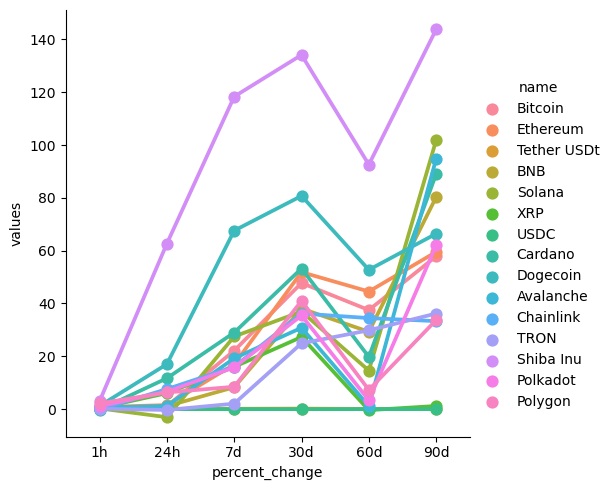

In [68]:
sns.catplot(x= 'percent_change', y= 'values',hue= 'name', data= df7, kind='point')

In [71]:
df8= df[['name', 'quote.USD.price', 'timestamp']]
df8= df8.query("name== 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,62274.32971,2024-03-02 00:30:56.850766
0,Bitcoin,62274.32971,2024-03-02 00:30:56.850766


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

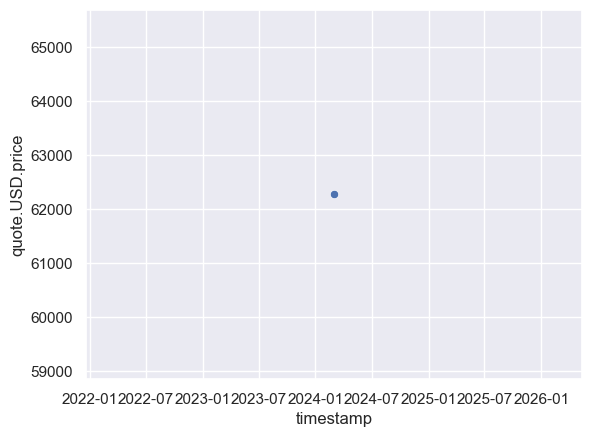

In [77]:
sns.set_theme(style= 'darkgrid')

sns.scatterplot(x= 'timestamp', y='quote.USD.price', data= df8)